<a href="https://colab.research.google.com/github/sambitdash/EVA-2/blob/master/Phase-2/Session-2/EVA_P2S2_File_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
2113536/2110848 [==============================] - 16s 8us/step
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [5]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 46)
y_test = tensorflow.keras.utils.to_categorical(y_test, 46)

In [6]:

y_test.shape

(2246, 46)

## Model Design

Introducing recurrent_regularizer and dropout improved the accuracy. 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

l2error = 1e-3

model = Sequential()
model.add(Embedding(max_features, 64, embeddings_regularizer=l2(l2error)))
model.add(SimpleRNN(64, return_sequences=True, recurrent_regularizer=l2(l2error), dropout=0.25))
model.add(SimpleRNN(64, return_sequences=True, recurrent_regularizer=l2(l2error), dropout=0.25))
model.add(SimpleRNN(64, return_sequences=True, recurrent_regularizer=l2(l2error), dropout=0.25))
model.add(SimpleRNN(64, recurrent_regularizer=l2(l2error), dropout=0.25))
model.add(Dense(46, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
__________________________________________________

/home/sambit/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/sambit/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


6287/6287 [==============================] - 13s 2ms/sample - loss: 4.0455 - acc: 0.1971 - val_loss: 3.0609 - val_acc: 0.3532
Epoch 2/10
6287/6287 [==============================] - 10s 2ms/sample - loss: 3.0178 - acc: 0.3452 - val_loss: 2.8725 - val_acc: 0.3532
Epoch 3/10
6287/6287 [==============================] - 10s 2ms/sample - loss: 2.8662 - acc: 0.3507 - val_loss: 2.7714 - val_acc: 0.3532
Epoch 4/10
6287/6287 [==============================] - 10s 2ms/sample - loss: 2.7386 - acc: 0.3693 - val_loss: 2.6411 - val_acc: 0.3733
Epoch 5/10
6287/6287 [==============================] - 10s 2ms/sample - loss: 2.5608 - acc: 0.4363 - val_loss: 2.5667 - val_acc: 0.4041
Epoch 6/10
6287/6287 [==============================] - 10s 2ms/sample - loss: 2.3849 - acc: 0.4896 - val_loss: 2.5967 - val_acc: 0.4015
Epoch 7/10
6287/6287 [==============================] - 10s 2ms/sample - loss: 2.2108 - acc: 0.5278 - val_loss: 2.4823 - val_acc: 0.4460
Epoch 8/10
6287/6287 [==============================

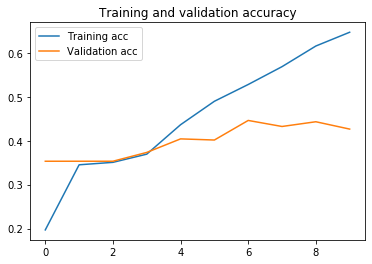

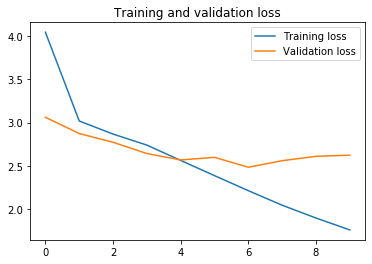

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()